# PRACTICE

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100)  # Linear relation with some noise


In [4]:
# Create a DataFrame for better visualization
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)
X_test

array([[0.98837384, 0.10204481],
       [0.19999652, 0.01852179],
       [0.4236548 , 0.64589411],
       [0.44712538, 0.84640867],
       [0.1494483 , 0.86812606],
       [0.5356328 , 0.58990998],
       [0.45615033, 0.56843395],
       [0.10022689, 0.91948261],
       [0.22308163, 0.95274901],
       [0.39822106, 0.20984375],
       [0.59204193, 0.57225191],
       [0.934214  , 0.61396596],
       [0.80731896, 0.56910074],
       [0.14335329, 0.94466892],
       [0.07103606, 0.0871293 ],
       [0.15896958, 0.11037514],
       [0.66676672, 0.67063787],
       [0.31542835, 0.36371077],
       [0.82099323, 0.09710128],
       [0.0202184 , 0.83261985]])

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.7440213475411046
R^2 Score: 0.7643614779347156


In [15]:
# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [2.37389678 5.11811706]
Intercept: 0.24049055360929383


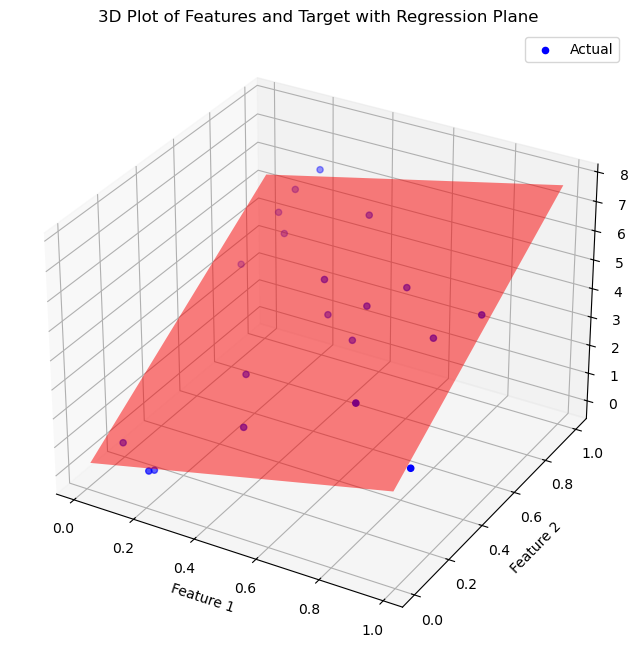

In [22]:
# 3D plot of the features and the target variable (optional)
fig = plt.figure(figsize=(12, 8))  
ax = fig.add_subplot(111, projection='3d')

# Plotting the actual data points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')

# Creating a grid of values for the features to plot the regression plane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 20), 
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 20))
zz = model.coef_[0] * xx + model.coef_[1] * yy + model.intercept_

# Plotting the regression plane
ax.plot_surface(xx, yy, zz, color='red', alpha=0.5, rstride=100, cstride=100)

# Adding labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Plot of Features and Target with Regression Plane')
ax.legend()

plt.show()